In [1]:
pip install ultralytics opencv-python matplotlib easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import easyocr

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
model = YOLO('yolov8x.pt')

100%|██████████| 131M/131M [00:00<00:00, 264MB/s]


In [5]:
image_path = '/content/drive/MyDrive/Computer_vision/Large_Vision_Models/car_plate/car.jpg'

In [6]:
image = cv2.imread(image_path)

results = model.predict(image)

reader = easyocr.Reader(['en'])

result = results[0]

result


0: 640x480 1 car, 80.8ms
Speed: 13.7ms preprocess, 80.8ms inference, 323.3ms postprocess per image at shape (1, 3, 640, 480)


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

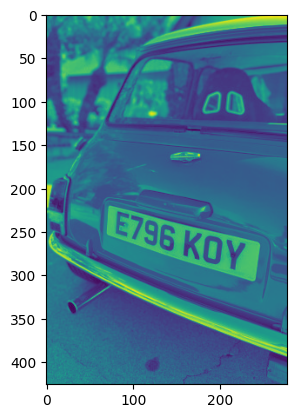

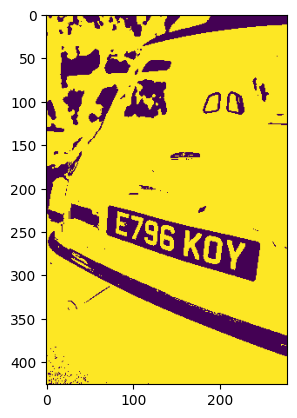

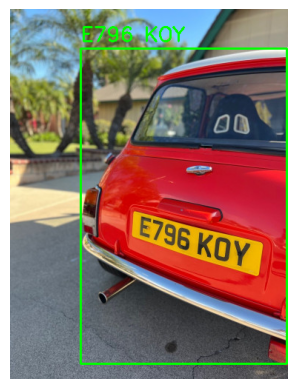

In [7]:
license_plates_text = []
for box in result.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
    class_id = int(box.cls.tolist()[0])
    label = result.names[class_id]

    if label in ["car", "vehicle"]:

        license_plate_img = image[y1:y2, x1:x2]

        license_plate_img_gray = cv2.cvtColor(license_plate_img, cv2.COLOR_BGR2GRAY)
        _, license_plate_img_binary = cv2.threshold(license_plate_img_gray, 128, 255, cv2.THRESH_BINARY_INV)

        plt.imshow(license_plate_img_gray)
        plt.show()
        plt.imshow(license_plate_img_binary)
        plt.show()

        plate_text = reader.readtext(license_plate_img_binary, detail=0)

        plate_text_combined = ' '.join(plate_text)

        if plate_text_combined:
            license_plates_text.append(plate_text_combined)

            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, plate_text_combined, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [8]:
if license_plates_text:
    print("نصوص لوحات السيارات المكتشفة:")
    for i, plate_text in enumerate(license_plates_text, 1):
        print(f"{plate_text}")
else:
    print("لم يتم العثور على لوحات سيارات في الصورة.")

نصوص لوحات السيارات المكتشفة:
E796 KOY


In [9]:
def detect_and_read_license_plates(image_path):

    model = YOLO('yolov8x.pt')

    image = cv2.imread(image_path)

    results = model.predict(image_path)

    reader = easyocr.Reader(['en'])

    result = results[0]

    license_plates_text = []
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
        class_id = int(box.cls.tolist()[0])
        label = result.names[class_id]

        if label in ["car", "vehicle"]:

            license_plate_img = image[y1:y2, x1:x2]

            license_plate_img_gray = cv2.cvtColor(license_plate_img, cv2.COLOR_BGR2GRAY)
            _, license_plate_img_binary = cv2.threshold(license_plate_img_gray, 128, 255, cv2.THRESH_BINARY_INV)

            plt.imshow(license_plate_img_gray)
            plt.show()
            plt.imshow(license_plate_img_binary)
            plt.show()

            plate_text = reader.readtext(license_plate_img_binary, detail=0)

            plate_text_combined = ' '.join(plate_text)

            if plate_text_combined:
                license_plates_text.append(plate_text_combined)

                cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(image, plate_text_combined, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    if license_plates_text:
        print("نصوص لوحات السيارات المكتشفة:")
        for i, plate_text in enumerate(license_plates_text, 1):
            print(f"{plate_text}")
    else:
        print("لم يتم العثور على لوحات سيارات في الصورة.")


image 1/1 /content/drive/MyDrive/Computer_vision/Large_Vision_Models/car_plate/car2.jpg: 352x640 2 cars, 64.8ms
Speed: 2.0ms preprocess, 64.8ms inference, 2.2ms postprocess per image at shape (1, 3, 352, 640)


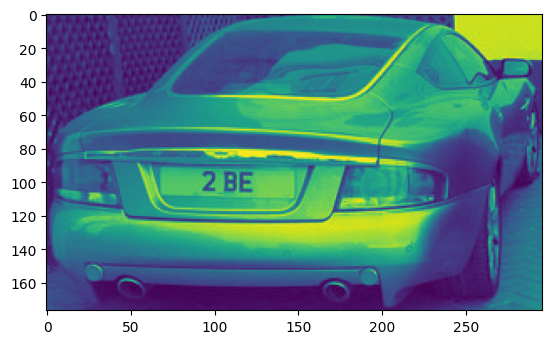

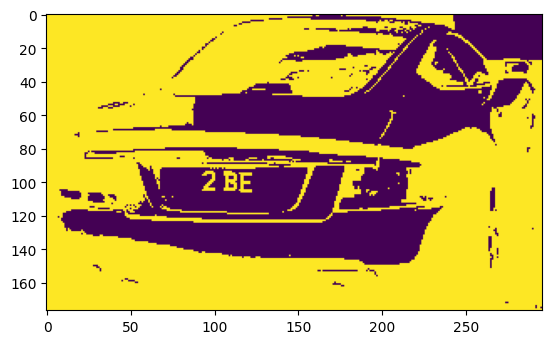

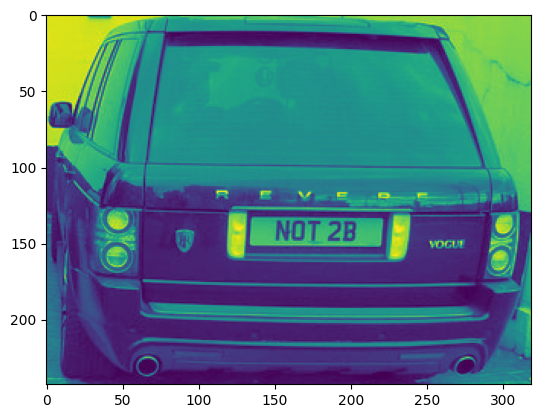

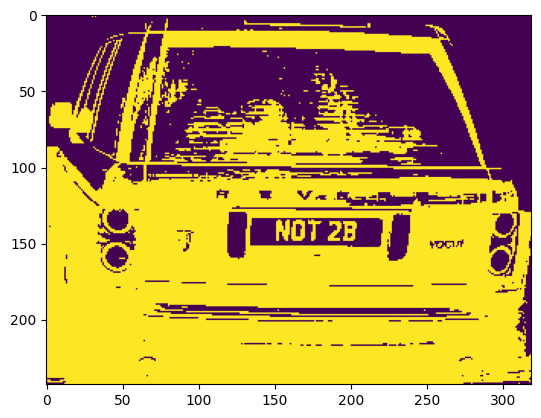

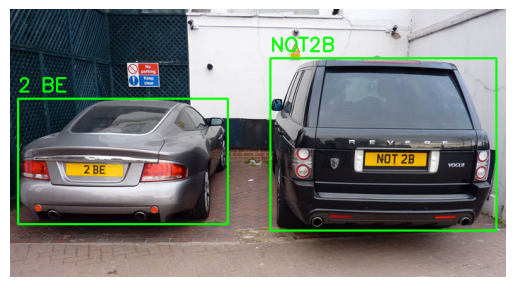

نصوص لوحات السيارات المكتشفة:
2 BE
NOT2B


In [10]:
detect_and_read_license_plates('/content/drive/MyDrive/Computer_vision/Large_Vision_Models/car_plate/car2.jpg')


image 1/1 /content/drive/MyDrive/Computer_vision/Large_Vision_Models/car_plate/carr.jpg: 448x640 1 person, 1 car, 1 backpack, 55.8ms
Speed: 2.3ms preprocess, 55.8ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)


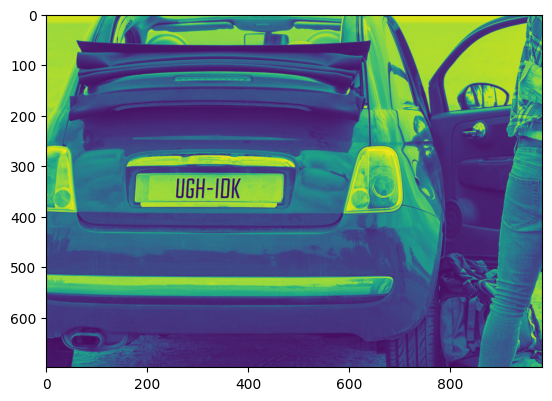

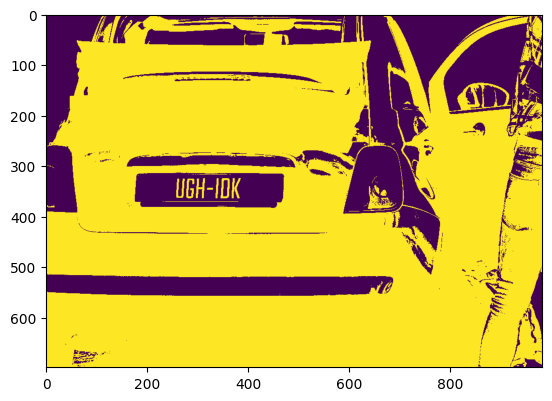

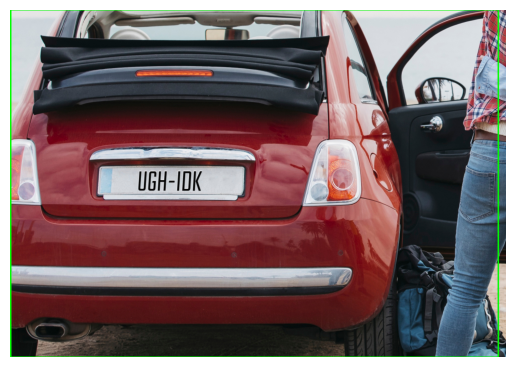

نصوص لوحات السيارات المكتشفة:
ugH-Idk


In [11]:
detect_and_read_license_plates('/content/drive/MyDrive/Computer_vision/Large_Vision_Models/car_plate/carr.jpg')